<a href="https://colab.research.google.com/github/ella-hong22/DATA_EDUCATION/blob/main/Keras_%ED%8C%8C%EC%95%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 1.x
import tensorflow
print(tensorflow.__version__)

TensorFlow 1.x selected.
1.15.2


# 모듈 임포팅

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

import time

In [4]:
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

# Keras DNN 최소 코드

## 데이터 준비
1차원 데이터 x와 x**2의 1차원 데이타 y

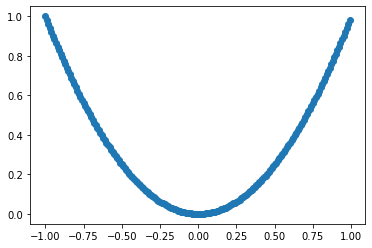

In [5]:
import numpy as np

x = np.arange(-1,1,0.01)
y = x**2

plt.scatter(x,y)

In [6]:
print(len(x))
print(x.shape)

200
(200,)


## 최소 코드
아래의 코드는 최소 코드.

In [7]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

import time

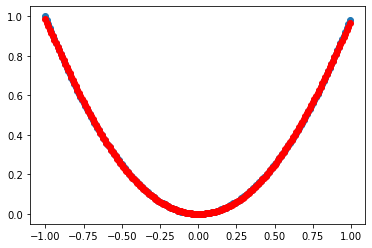

In [10]:
# 모델 구조 정의
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))



# 컴파일 : 모델 + optimizer + loss
model.compile(optimizer="SGD", loss="mse") #mse = 예상값 - 실제값의 차이의 평균 


# 학습
model.fit(x, y, epochs=10000, verbose=0, batch_size=20) #epochs = 1000은 모든 데이터를 1000번 학습 


# 예측
y_ = model.predict(x)


# 결과 그래프로 보기
plt.scatter(x,y) # 정답
plt.scatter(x,y_,color='r') # 결과
plt.show()

# Keras DNN 최소 코드에 기본 정도만 추가
최소는 아니고, 이정도는 매번 사용하는 코드

## model.evaluate() - 성능 평가하기

200/200 [==============================] - 0s 203us/sample - loss: 0.0182 - mean_absolute_error: 0.0182
loss= 0.018249965459108352
mse= 0.018249964


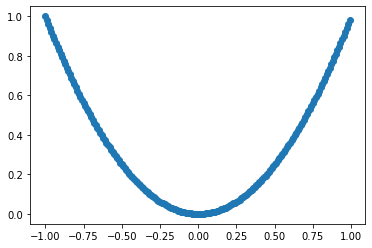

In [13]:
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense


model = keras.Sequential()
#model.add(Input(1))
model.add(Dense(10, activation='tanh', input_shape=(1,) )) #???
model.add(Dense(10, activation='tanh' ))
model.add(Dense(1))


#model.compile(optimizer="SGD", loss="mse")
# model.compile(optimizer="SGD", loss="mse", metrics=["mse"]) 
model.compile(optimizer="SGD", loss="mae", metrics=["mae"])


model.fit(x, y, epochs=1000, verbose=0, batch_size=20)

loss, mse = model.evaluate(x, y) # ADD
print("loss=",loss) # ADD
print("mse=",mse) # ADD


y_ = model.predict(x)


plt.scatter(x,y)

#선생님과 출력값이 나르게 나타난다. 그럴수 있다. 

## 테스트셋으로 평가하기
데이터를 train과 test으로 나누어 준비한다.

In [15]:
print(x.shape[0])

200


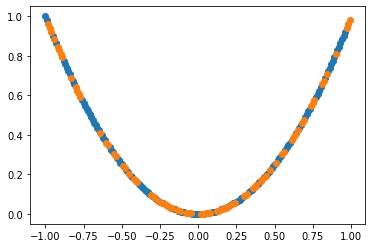

In [14]:
x = np.arange(-1,1,0.01)
np.random.shuffle(x)
y = x**2

split_index = int(x.shape[0]*0.6)

train_x, test_x = x[:split_index], x[split_index:] # 7:3 8:2 비율 
train_y, test_y = y[:split_index], y[split_index:]

plt.scatter(train_x,train_y)
plt.scatter(test_x,test_y)
plt.show()

80/80 [==============================] - 0s 513us/sample - loss: 0.0022 - mean_squared_error: 0.0022
loss= 0.0022469503339380024
mse= 0.0022469503


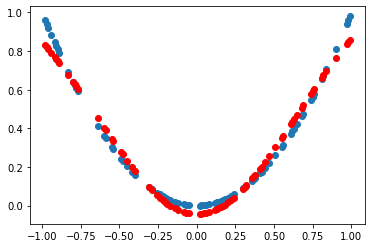

In [16]:
model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])


# model.fit(x, y, epochs=1000, verbose=0, batch_size=20)
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)


# loss, mse = model.evaluate(x, y)
loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


# y_ = model.predict(x)
y_ = model.predict(test_x)

# plt.scatter(x,y)
plt.scatter(test_x,test_y)
# plt.scatter(x,y_,color='r')
plt.scatter(test_x,y_,color='r')
plt.show()

train_x, train_y로 학습하였고, evaluate()와 predict()에는 test_x, test_y를 사용하였다.

그려진 그림을 보면 test_x의 점사이에 빈 간격이 보인다. 그 간격이 train_x에 해당한다.

##Base Model 결과 저장
이후 비교를 위해 그래프를 저장해 둔다.